In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
df=pd.read_csv('train.csv')

In [325]:
df['Purchase'].value_counts()

0    2454
1     164
Name: Purchase, dtype: int64

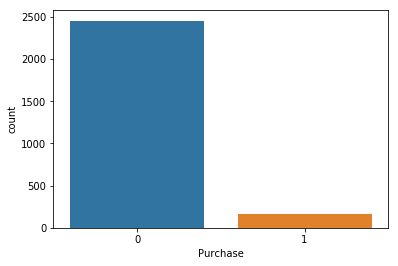

In [326]:
# Now lets check the class distributions
sns.countplot("Purchase",data=df)

In [327]:
df.shape

(2618, 87)

In [328]:
y = df.Purchase
X = df.drop('Purchase', axis=1)
X=X.iloc[:,1:]

In [329]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0, 3, 4])
X = onehotencoder.fit_transform(X).toarray()

In [330]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [331]:
from sklearn.linear_model import RandomizedLogisticRegression
randomlr = RandomizedLogisticRegression(selection_threshold=0.25)
X_train = randomlr.fit_transform(X_train,y_train)
X_test = randomlr.transform(X_test)

C:\Users\Jaadugar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [332]:
X_train.shape

(2356, 6)

# SMOTE algorithm (Synthetic Minority Oversampling Technique) 

In [333]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42,ratio=1.0)

In [334]:
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\Jaadugar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


## Randomized Logistic Regression

### Random Forest 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=12)
classifier.fit(X_train, y_train)

### XGBoost 

In [335]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

### SVM 

#classifier
from sklearn.svm import SVC
classifier= SVC(kernel='rbf', random_state=0,class_weight='balanced')
classifier.fit(X_train, y_train)

### KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

### Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

### Decision Trees 

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)

In [336]:
classifier.score(X_test,y_test)

0.74809160305343514

In [337]:
from sklearn.metrics import recall_score
recall_score(y_test,classifier.predict(X_test))

0.42105263157894735

# Predicting the Test Data

In [338]:
df_test=pd.read_csv('test.csv')
X_test=df_test.iloc[:,1:].values
X_test.shape

(2553, 85)

In [343]:
X_test = onehotencoder.fit_transform(X_test).toarray()

In [344]:
X_test = randomlr.transform(X_test)

In [345]:
y_pred = classifier.predict(X_test)

In [346]:
print( np.unique(y_pred ))

[0 1]


In [347]:
np.count_nonzero(y_pred)

615

# Saving the file

In [348]:
#Saving the file
result=pd.read_csv('update.csv')
result['Purchase']=y_pred

In [349]:
result.to_csv('svm.csv',index=False)